In [56]:
import pandas as pd
import os

def load_ag_data():
    AG_PATH=os.path.join("datasets", "ag")
    csv_path=os.path.join(AG_PATH, "ltv_export.csv")
    return pd.read_csv(csv_path, parse_dates=["Earliest Earliest order_date"])

In [57]:
ag= load_ag_data()
ag.head()

,name,Latest invoice_date,Earliest Earliest order_date,number_of_blanks,number_of_devices,number_of_cases,sum_units,Average of units,net_sales,Average of net_sales,L90D_Purchase
0,Hal-Dent,2021-07-07 00:00:00,2011-09-07 02:00:00,13092,23,16211,1921,1.53,199457 €,159 €,55.0
1,DSH Dentaltechnik GmbH,2021-07-05 00:00:00,2010-11-10 01:00:00,95,9,12870,930,1.19,119021 €,152 €,18.0
2,Rainer Ulbricht,2021-06-23 00:00:00,2012-07-13 02:00:00,813,22,8877,398,1.33,44553 €,149 €,6.0
3,Erhardt,2021-07-13 00:00:00,2012-01-23 01:00:00,110,12,8467,862,1.84,89808 €,191 €,11.0
4,Ketterling Dental Technik GmbH,2021-06-04 00:00:00,2010-11-26 01:00:00,177,10,8437,694,2.38,85882 €,295 €,2.0


In [91]:
from datetime import date
from datetime import datetime
from dateutil import parser

f_date = ag["Earliest Earliest order_date"]
l_date = datetime.today()
delta = l_date - f_date
ag["age"]=delta.view(int)

In [92]:
ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          269 non-null    object        
 1   Latest invoice_date           269 non-null    object        
 2   Earliest Earliest order_date  269 non-null    datetime64[ns]
 3   number_of_blanks              269 non-null    int64         
 4   number_of_devices             269 non-null    int64         
 5   number_of_cases               269 non-null    int64         
 6   sum_units                     269 non-null    int64         
 7   Average of units              269 non-null    float64       
 8   net_sales                     269 non-null    object        
 9   Average of net_sales          269 non-null    object        
 10  L90D_Purchase                 212 non-null    float64       
 11  age                           26

In [93]:
ag.describe()

,number_of_blanks,number_of_devices,number_of_cases,sum_units,Average of units,L90D_Purchase,age
count,269.000000,269.000000,269.000000,269.000000,269.000000,212.000000,2.690000e+02
mean,168.769517,7.159851,1161.765799,294.933086,1.270855,11.231132,2.056246e+17
std,817.295348,4.288185,2028.136214,285.018792,0.497870,10.595911,1.020080e+17
min,0.000000,0.000000,0.000000,2.000000,0.170000,0.000000,4.358980e+15
25%,0.000000,4.000000,0.000000,87.000000,1.020000,4.000000,1.164234e+17
50%,64.000000,6.000000,246.000000,213.000000,1.140000,7.500000,2.119818e+17
75%,146.000000,9.000000,1490.000000,412.000000,1.400000,15.000000,2.969994e+17
max,13092.000000,27.000000,16211.000000,1921.000000,4.410000,57.000000,3.588618e+17


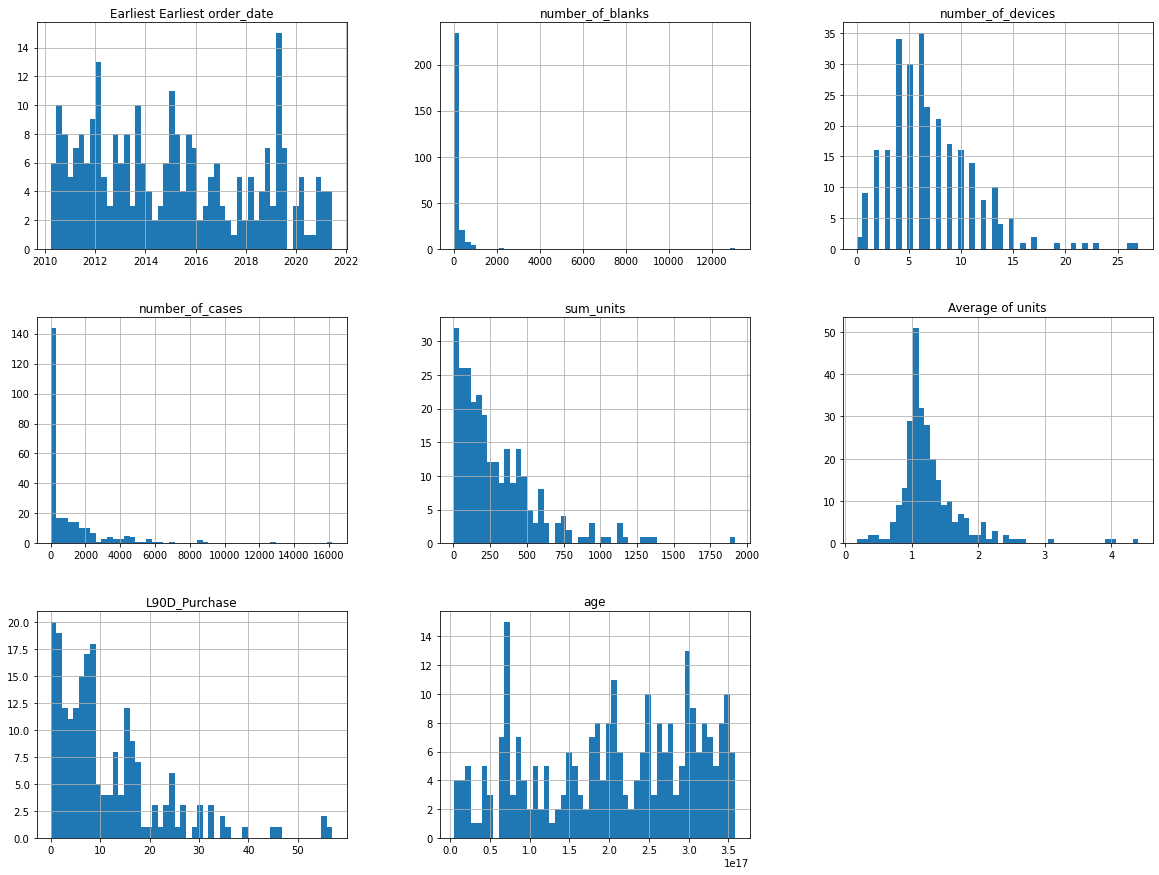

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
ag.hist(bins=50, figsize=(20,15))
plt.show()

In [87]:
corr_matrix=ag.corr()

In [88]:
corr_matrix["L90D_Purchase"].sort_values(ascending=False)

L90D_Purchase        1.000000
sum_units            0.543689
Average of units     0.333509
number_of_blanks     0.313799
number_of_cases      0.237513
number_of_devices    0.199847
age                 -0.020735
Name: L90D_Purchase, dtype: float64

array([[<AxesSubplot:xlabel='L90D_Purchase', ylabel='L90D_Purchase'>,
        <AxesSubplot:xlabel='sum_units', ylabel='L90D_Purchase'>,
        <AxesSubplot:xlabel='Average of units', ylabel='L90D_Purchase'>,
        <AxesSubplot:xlabel='age', ylabel='L90D_Purchase'>],
       [<AxesSubplot:xlabel='L90D_Purchase', ylabel='sum_units'>,
        <AxesSubplot:xlabel='sum_units', ylabel='sum_units'>,
        <AxesSubplot:xlabel='Average of units', ylabel='sum_units'>,
        <AxesSubplot:xlabel='age', ylabel='sum_units'>],
       [<AxesSubplot:xlabel='L90D_Purchase', ylabel='Average of units'>,
        <AxesSubplot:xlabel='sum_units', ylabel='Average of units'>,
        <AxesSubplot:xlabel='Average of units', ylabel='Average of units'>,
        <AxesSubplot:xlabel='age', ylabel='Average of units'>],
       [<AxesSubplot:xlabel='L90D_Purchase', ylabel='age'>,
        <AxesSubplot:xlabel='sum_units', ylabel='age'>,
        <AxesSubplot:xlabel='Average of units', ylabel='age'>,
        <AxesSu

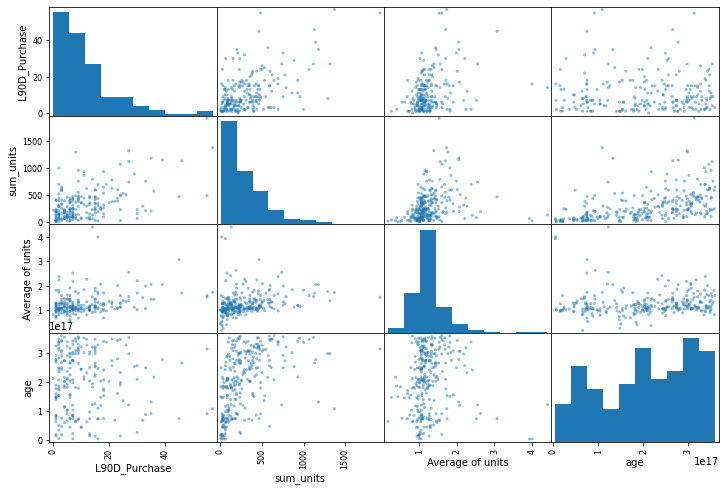

In [96]:
from pandas.plotting import scatter_matrix
attributes = ["L90D_Purchase", "sum_units", "Average of units", "age"]
scatter_matrix(ag[attributes], figsize=(12,8))